In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("On_Time_On_Time_Performance_2015_1.csv")

/usr/lib64/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.sample()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
14743,2015,1,1,9,5,2015-01-09,AA,19805,AA,N850AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.count()

Year                  469968
Quarter               469968
Month                 469968
DayofMonth            469968
DayOfWeek             469968
FlightDate            469968
UniqueCarrier         469968
AirlineID             469968
Carrier               469968
TailNum               467186
FlightNum             469968
OriginAirportID       469968
OriginAirportSeqID    469968
OriginCityMarketID    469968
Origin                469968
OriginCityName        469968
OriginState           469968
OriginStateFips       469968
OriginStateName       469968
OriginWac             469968
DestAirportID         469968
DestAirportSeqID      469968
DestCityMarketID      469968
Dest                  469968
DestCityName          469968
DestState             469968
DestStateFips         469968
DestStateName         469968
DestWac               469968
CRSDepTime            469968
                       ...  
Div2WheelsOn              27
Div2TotalGTime            27
Div2LongestGTime          27
Div2WheelsOff 

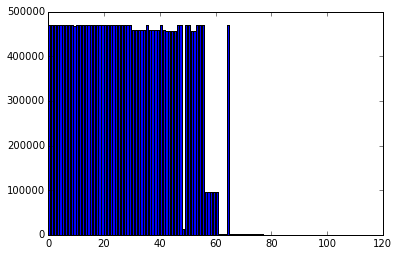

In [6]:
locx=range(len(df.columns))
plt.bar(locx,df.count())
plt.show()

In [7]:
#similar with Series to Dataframes
s1= Series([1,2,3,4])
s1[2]

3

In [8]:
s1[[True,False,True,True]]

0    1
2    3
3    4
dtype: int64

In [9]:
columncount = df.count()
falselist = [False for x in range(len(columncount))]

In [10]:
columncount > 1000

Year                   True
Quarter                True
Month                  True
DayofMonth             True
DayOfWeek              True
FlightDate             True
UniqueCarrier          True
AirlineID              True
Carrier                True
TailNum                True
FlightNum              True
OriginAirportID        True
OriginAirportSeqID     True
OriginCityMarketID     True
Origin                 True
OriginCityName         True
OriginState            True
OriginStateFips        True
OriginStateName        True
OriginWac              True
DestAirportID          True
DestAirportSeqID       True
DestCityMarketID       True
Dest                   True
DestCityName           True
DestState              True
DestStateFips          True
DestStateName          True
DestWac                True
CRSDepTime             True
                      ...  
Div2WheelsOn          False
Div2TotalGTime        False
Div2LongestGTime      False
Div2WheelsOff         False
Div2TailNum         

In [11]:
goodcolumncount = columncount[columncount >1000]

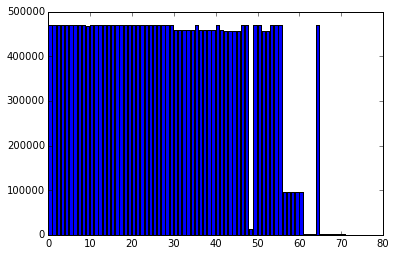

In [12]:
locx=range(len(goodcolumncount))
plt.bar(locx,goodcolumncount)
plt.show()

In [13]:
# reducing columns of DataFrame
df = df[goodcolumncount.index]
len(df.columns)

71

In [14]:
# Output is a Seie
df.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False], dtype=bool)

In [15]:
# Deleting redundant columns
df.columns[df.columns.str.contains('Origin')]

Index([u'OriginAirportID', u'OriginAirportSeqID', u'OriginCityMarketID',
       u'Origin', u'OriginCityName', u'OriginState', u'OriginStateFips',
       u'OriginStateName', u'OriginWac'],
      dtype='object')

In [16]:
df['OriginCityName'].sample(5)

271990         San Jose, CA
158664          Houston, TX
71523      White Plains, NY
167513           Dallas, TX
124871    San Francisco, CA
Name: OriginCityName, dtype: object

In [17]:
df.columns[df.columns.str.contains('Delay')]

Index([u'DepDelay', u'DepDelayMinutes', u'DepartureDelayGroups', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrivalDelayGroups', u'CarrierDelay',
       u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay'],
      dtype='object')

In [18]:
df.columns[df.columns.str.contains('Dest')]

Index([u'DestAirportID', u'DestAirportSeqID', u'DestCityMarketID', u'Dest',
       u'DestCityName', u'DestState', u'DestStateFips', u'DestStateName',
       u'DestWac'],
      dtype='object')

In [19]:
# creating indexes
i1=pd.Index([0,1,2,])
i2=pd.Index([1,2,3])

In [20]:
i1 & i2

Int64Index([1, 2], dtype='int64')

In [21]:
i1 | i2

Int64Index([0, 1, 2, 3], dtype='int64')

In [22]:
origincolumn = df.columns[df.columns.str.contains('Origin')]
destcolumn = df.columns[df.columns.str.contains('Dest')]

In [23]:
origincolumn | destcolumn

Index([u'Dest', u'DestAirportID', u'DestAirportSeqID', u'DestCityMarketID',
       u'DestCityName', u'DestState', u'DestStateFips', u'DestStateName',
       u'DestWac', u'Origin', u'OriginAirportID', u'OriginAirportSeqID',
       u'OriginCityMarketID', u'OriginCityName', u'OriginState',
       u'OriginStateFips', u'OriginStateName', u'OriginWac'],
      dtype='object')

In [24]:
# dropping columns
df.columns[df.columns.str.contains('Div')]

Index([u'Diverted', u'DivAirportLandings', u'Div1Airport', u'Div1AirportID',
       u'Div1AirportSeqID', u'Div1WheelsOn', u'Div1TotalGTime',
       u'Div1LongestGTime'],
      dtype='object')

In [25]:
len(df.columns)

71

In [26]:
# drop funtion dors not modify dataframe
df = df.drop(df.columns[df.columns.str.contains('Div')],axis=1)
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
106340,2015,1,1,16,5,2015-01-16,DL,19790,DL,N826DN,...,594,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271781,2015,1,1,1,4,2015-01-01,OO,20304,OO,N813SK,...,697,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260200,2015,1,1,8,4,2015-01-08,OO,20304,OO,N187PQ,...,236,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333992,2015,1,1,5,1,2015-01-05,US,20355,US,N655AW,...,1671,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376151,2015,1,1,2,5,2015-01-02,EV,20366,EV,N14977,...,295,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.fillna(0).sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
311831,2015,1,1,17,6,2015-01-17,UA,19977,UA,N464UA,...,2065,9,0,0,0,0,0,0,0,0
272417,2015,1,1,9,5,2015-01-09,OO,20304,OO,N794SK,...,912,4,0,0,0,0,0,0,0,0
388369,2015,1,1,30,5,2015-01-30,EV,20366,EV,N14568,...,489,2,0,0,0,0,0,0,0,0
329911,2015,1,1,2,5,2015-01-02,US,20355,US,N644AW,...,130,1,0,0,0,0,0,0,0,0
253534,2015,1,1,16,5,2015-01-16,OO,20304,OO,N564SW,...,132,1,0,0,0,0,0,0,0,0


In [28]:
# modifying values
def replace(integer):
    if integer ==7:
        return np.nan
    else:
        return integer
df["NewDay"] = df["DayOfWeek"].apply(replace)
df.sample(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,NewDay
15231,2015,1,1,28,3,2015-01-28,AA,19805,AA,N3ELAA,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
66529,2015,1,1,8,4,2015-01-08,B6,20409,B6,N206JB,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
232512,2015,1,1,30,5,2015-01-30,WN,19393,WN,N7707C,...,2,0,0,89,0,0,NaN,NaN,NaN,5
34373,2015,1,1,26,1,2015-01-26,AA,19805,AA,N466AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
252348,2015,1,1,30,5,2015-01-30,OO,20304,OO,N630SK,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
282339,2015,1,1,24,6,2015-01-24,OO,20304,OO,N568SW,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
99261,2015,1,1,13,2,2015-01-13,DL,19790,DL,N820DN,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
367344,2015,1,1,28,3,2015-01-28,DL,19790,DL,N325NB,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
172487,2015,1,1,15,4,2015-01-15,WN,19393,WN,N456WN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
117880,2015,1,1,24,6,2015-01-24,US,20355,US,N196UW,...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [29]:
df.dtypes

Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
FlightDate               object
UniqueCarrier            object
AirlineID                 int64
Carrier                  object
TailNum                  object
FlightNum                 int64
OriginAirportID           int64
OriginAirportSeqID        int64
OriginCityMarketID        int64
Origin                   object
OriginCityName           object
OriginState              object
OriginStateFips           int64
OriginStateName          object
OriginWac                 int64
DestAirportID             int64
DestAirportSeqID          int64
DestCityMarketID          int64
Dest                     object
DestCityName             object
DestState                object
DestStateFips             int64
DestStateName            object
DestWac                   int64
CRSDepTime                int64
                         ...   
Departur

In [30]:
# df.types
import datetime

In [31]:
t = datetime.datetime.now()
t

datetime.datetime(2015, 12, 19, 11, 23, 59, 745475)

In [32]:
t.hour

11

In [33]:
t.minute

23

In [34]:
# from string to datetime
t2 = datetime.datetime.strptime('2015-01-23','%Y-%m-%d')
t2

datetime.datetime(2015, 1, 23, 0, 0)

In [35]:
# from datetime to string
t2.strftime("%m-%d-%Y")

'01-23-2015'

In [36]:
# modifyinf dtype of series 
df["FlifghtDateDt"] = pd.to_datetime(df['FlightDate'],format="%Y-%m-%d")
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,NewDay,FlifghtDateDt
358847,2015,1,1,22,4,2015-01-22,B6,20409,B6,N239JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2015-01-22
239901,2015,1,1,8,4,2015-01-08,NK,20416,NK,N634NK,...,0,0,30,0,0,NaN,NaN,NaN,4,2015-01-08
8643,2015,1,1,19,1,2015-01-19,AA,19805,AA,N3ABAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-19
275580,2015,1,1,18,7,2015-01-18,OO,20304,OO,N938SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-18
17244,2015,1,1,6,2,2015-01-06,AA,19805,AA,N5CRAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2015-01-06


In [37]:
df['FlighNumS'] = df['FlightNum'].map(str)
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,NewDay,FlifghtDateDt,FlighNumS
258618,2015,1,1,28,3,2015-01-28,OO,20304,OO,N823SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2015-01-28,4495
426866,2015,1,1,20,2,2015-01-20,EV,20366,EV,N14177,...,0,0,0,34,NaN,NaN,NaN,2,2015-01-20,6156
130181,2015,1,1,28,3,2015-01-28,VX,21171,VX,N636VA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2015-01-28,922
190991,2015,1,1,19,1,2015-01-19,WN,19393,WN,N691WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2015-01-19,4995
320392,2015,1,1,6,2,2015-01-06,UA,19977,UA,N53442,...,0,0,0,15,NaN,NaN,NaN,2,2015-01-06,1145


In [38]:
df.dtypes

Year                           int64
Quarter                        int64
Month                          int64
DayofMonth                     int64
DayOfWeek                      int64
FlightDate                    object
UniqueCarrier                 object
AirlineID                      int64
Carrier                       object
TailNum                       object
FlightNum                      int64
OriginAirportID                int64
OriginAirportSeqID             int64
OriginCityMarketID             int64
Origin                        object
OriginCityName                object
OriginState                   object
OriginStateFips                int64
OriginStateName               object
OriginWac                      int64
DestAirportID                  int64
DestAirportSeqID               int64
DestCityMarketID               int64
Dest                          object
DestCityName                  object
DestState                     object
DestStateFips                  int64
D

In [41]:
# Using copy and paste
df.columns[df.columns.str.contains('Delay')]

Index([u'DepDelay', u'DepDelayMinutes', u'DepartureDelayGroups', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrivalDelayGroups', u'CarrierDelay',
       u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay'],
      dtype='object')

In [49]:
delayreasonsum = df[[u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay']].sum()
delayreasonsum

CarrierDelay         1708155
WeatherDelay          263087
NASDelay             1278055
SecurityDelay           6700
LateAircraftDelay    2183865
dtype: float64

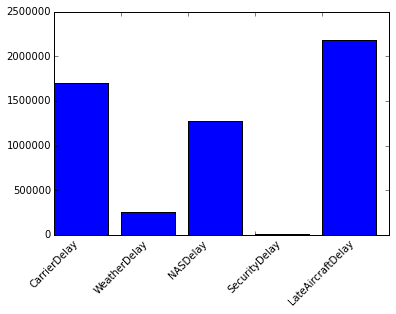

In [52]:
locx = range(len(delayreasonsum))
plt.bar(locx,delayreasonsum)
plt.xticks(locx,delayreasonsum.index,rotation=45)
plt.show()

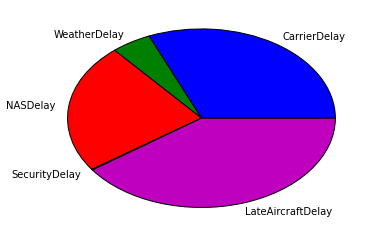

In [54]:
plt.pie(delayreasonsum,labels=delayreasonsum.index)
plt.show()

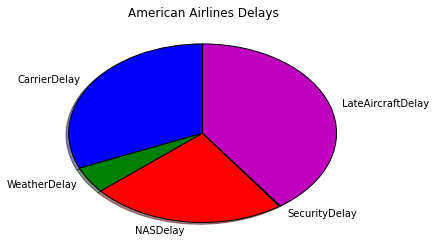

In [63]:
dfAA = df[df['Carrier']=="AA"]
delayreasonsumAA= dfAA[[u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay']].sum
plt.pie(delayreasonsum,labels=delayreasonsum.index,shadow=True,startangle=90)
plt.title("American Airlines Delays")
plt.show()

In [67]:
delaycol = [u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay', u'LateAircraftDelay']
by_carrier = df.groupby("Carrier")
by_carrier

In [71]:
delaysumcarries = by_carrier[deldelaycol].sum()
delaysumcarries

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Carrier,,,,,
AA,203731,24820,100460,636,225852
AS,28833,7333,23322,104,40466
B6,76452,9393,80780,1144,108437
DL,177509,41375,119586,582,120406
EV,225639,19179,164336,0,254080
F9,33264,1293,48440,0,66621
HA,17102,1415,1710,162,15175
MQ,147471,54185,152168,996,246744
NK,20312,607,93908,384,24678


In [73]:
by_carrier.groups.keys()

['AA',
 'OO',
 'DL',
 'NK',
 'HA',
 'WN',
 'B6',
 'US',
 'AS',
 'MQ',
 'F9',
 'VX',
 'EV',
 'UA']

In [75]:
delaysumcarriersAA2 = delaysumcarries.ix["AA"]
delaysumcarriersAA2

CarrierDelay         203731
WeatherDelay          24820
NASDelay             100460
SecurityDelay           636
LateAircraftDelay    225852
Name: AA, dtype: float64

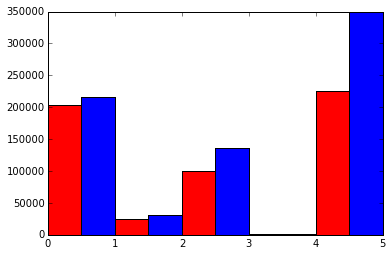

In [103]:
locx = np.arange(len(delaysumcarriersAA2))
plt.bar(locx,delaysumcarriersAA2,0.5,color='r')
locx2 = locx + 0.5
plt.bar(locx2,delaysumcarries.ix["OO"],0.5)
plt.show()

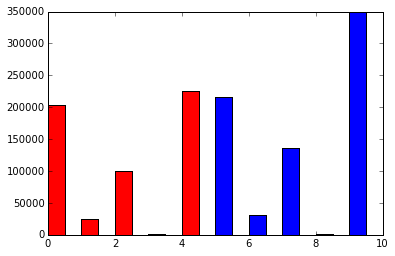

In [92]:
locx = np.arange(len(delaysumcarriersAA2))
plt.bar(locx,delaysumcarriersAA2,0.5,color='r')
locx2 = locx + len(delaysumcarriersAA2)
plt.bar(locx2,delaysumcarries.ix["OO"],0.5)
plt.show()

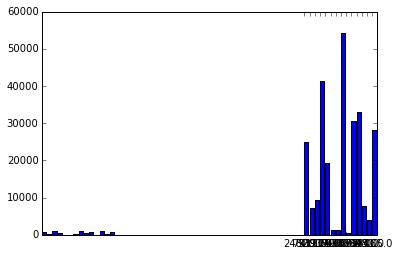

In [106]:
locx1 = np.arange(len(delaysumcarries['SecurityDelay']))
plt.bar(locx1,delaysumcarries['SecurityDelay'])
plt.xticks(locx1,delaysumcarries['SecurityDelay'])

locx2 = np.arange(len(delaysumcarries['WeatherDelay']))+50
plt.bar(locx2,delaysumcarries['WeatherDelay'])
plt.xticks(locx2,delaysumcarries['WeatherDelay'])

plt.show()

In [116]:
delaysum = by_carrier["DepDelay"].sum()
delaysum

Carrier
AA    457355
AS     41946
B6    206040
DL    376407
EV    470725
F9    121305
HA      8408
MQ    444967
NK    113676
OO    570636
UA    524744
US    169183
VX     32142
WN    935339
Name: DepDelay, dtype: float64

In [118]:
delaysum.sort(ascending=False)
delaysum

Carrier
WN    935339
OO    570636
UA    524744
EV    470725
AA    457355
MQ    444967
DL    376407
B6    206040
US    169183
F9    121305
NK    113676
AS     41946
VX     32142
HA      8408
Name: DepDelay, dtype: float64

In [154]:
by_airport = df.groupby("OriginCityName")
by_airport

In [155]:
delaysumairport=by_airport['WeatherDelay'].sum()
delaysumairport.sort(ascending=False)
delaysumairport.head(5)

OriginCityName
Chicago, IL       93112
New York, NY      18552
Atlanta, GA       11978
Washington, DC     9453
Boston, MA         8133
Name: WeatherDelay, dtype: float64

In [156]:
by_airport2 = df.groupby("OriginCityName")['WeatherDelay'].agg(['mean','count'])
by_airport3 = by_airport2[by_airport2['count'] >1000]
by_airport3.sort('mean',ascending=False).head(5)

,mean,count
OriginCityName,,
"Chicago, IL",10.528268,8844
"Washington, DC",4.505720,2098
"New York, NY",4.388928,4227
"Boston, MA",4.194430,1939
"Salt Lake City, UT",3.363402,1164


In [173]:
df['FlightDate2'] = pd.to_datetime(df['FlightDate'],format="%Y-%m-%d")
by_flightdate = df.groupby('FlightDate2')
flightevo=by_flightdate['Year'].count()

In [176]:
flightevo.sort_index()
flightevo

FlightDate2
2015-01-01    13950
2015-01-02    16741
2015-01-03    15434
2015-01-04    16352
2015-01-05    16548
2015-01-06    15315
2015-01-07    15571
2015-01-08    16009
2015-01-09    16008
2015-01-10    12344
2015-01-11    14754
2015-01-12    15888
2015-01-13    15180
2015-01-14    15520
2015-01-15    16020
2015-01-16    16070
2015-01-17    12070
2015-01-18    13855
2015-01-19    15841
2015-01-20    15187
2015-01-21    15525
2015-01-22    16013
2015-01-23    16056
2015-01-24    12280
2015-01-25    14720
2015-01-26    15890
2015-01-27    15155
2015-01-28    15525
2015-01-29    16030
2015-01-30    16080
2015-01-31    12037
Name: Year, dtype: int64

<function matplotlib.pyplot.show>

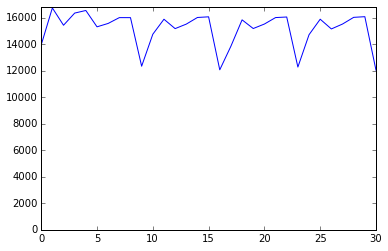

In [177]:
plt.plot(flightevo)
plt.ylim(0,flightevo.max()+100)
plt.show

In [178]:
df.columns

Index([u'Year', u'Quarter', u'Month', u'DayofMonth', u'DayOfWeek',
       u'FlightDate', u'UniqueCarrier', u'AirlineID', u'Carrier', u'TailNum',
       u'FlightNum', u'OriginAirportID', u'OriginAirportSeqID',
       u'OriginCityMarketID', u'Origin', u'OriginCityName', u'OriginState',
       u'OriginStateFips', u'OriginStateName', u'OriginWac', u'DestAirportID',
       u'DestAirportSeqID', u'DestCityMarketID', u'Dest', u'DestCityName',
       u'DestState', u'DestStateFips', u'DestStateName', u'DestWac',
       u'CRSDepTime', u'DepTime', u'DepDelay', u'DepDelayMinutes', u'DepDel15',
       u'DepartureDelayGroups', u'DepTimeBlk', u'TaxiOut', u'WheelsOff',
       u'WheelsOn', u'TaxiIn', u'CRSArrTime', u'ArrTime', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrDel15', u'ArrivalDelayGroups', u'ArrTimeBlk',
       u'Cancelled', u'CancellationCode', u'CRSElapsedTime',
       u'ActualElapsedTime', u'AirTime', u'Flights', u'Distance',
       u'DistanceGroup', u'CarrierDelay', u'WeatherDelay', u'NA

In [182]:
# correlation
df[['FlightNum','Distance','AirTime']].corr()

,FlightNum,Distance,AirTime
FlightNum,1.000000,-0.349912,-0.335150
Distance,-0.349912,1.000000,0.981376
AirTime,-0.335150,0.981376,1.000000


In [187]:
def extracthour(n):
    return int(n/100)
df['Hour'] = df['DepTime'].fillna(0).apply(extracthour)

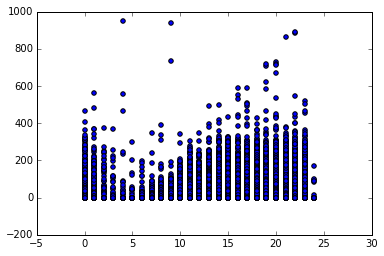

In [189]:
plt.scatter(df['Hour'],df['LateAircraftDelay'])
plt.show()

In [191]:
by_hour = df.groupby('Hour')

In [202]:
hours = []
groups = []

for h,g in by_hour:
    hours.append(h)
    groups.append(g['LateAircraftDelay'].dropna(0))

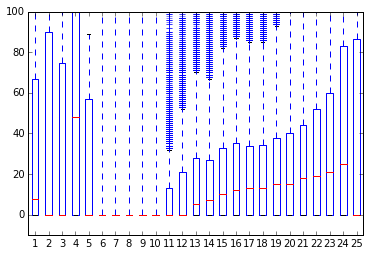

In [198]:
plt.boxplot(groups)
plt.ylim(-10,100)
plt.show()